### DataFrame 类

In [1]:
import numpy as np 
import pandas as pd

df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'], index=['a', 'b', 'c', 'd'])
print(df)
print(df.index)
print(df.columns)
print('-'*30)

print(df.loc['c'])
print(df.loc[['a', 'd']])
print('-'*30)

print(df.iloc[1:3])         # loc是基于标签的，它允许我们根据列名或行名来选择数据。而iloc是基于位置的，它允许我们根据列的整数索引或行的整数索引来选择数据
print('-'*30)

print(df.sum())
print('-'*30)

print(df.apply(lambda x: x**2))
print(df**2)

   numbers
a       10
b       20
c       30
d       40
Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['numbers'], dtype='object')
------------------------------
numbers    30
Name: c, dtype: int64
   numbers
a       10
d       40
------------------------------
   numbers
b       20
c       30
------------------------------
numbers    100
dtype: int64
------------------------------
   numbers
a      100
b      400
c      900
d     1600
   numbers
a      100
b      400
c      900
d     1600


In [42]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'], index=['a', 'b', 'c', 'd'])
df['floats'] = [1.5, 2.5, 3.5, 4.5]
df['names'] = pd.DataFrame(['Yves', 'Sandra', 'Lilli', 'Henry'], index=['d', 'a', 'b', 'c'])        # 索引会自动对其

df1 = pd.DataFrame({'numbers':100, 'floats':5.75, 'names':'Jil'}, index=['y'])
df2 = pd.DataFrame({'names':'Liz'}, index=['z'])
df = df._append(df1)._append(df2, sort=False)
df 


,numbers,floats,names
a,10.0,1.50,Sandra
b,20.0,2.50,Lilli
c,30.0,3.50,Henry
d,40.0,4.50,Yves
y,100.0,5.75,Jil
z,NaN,NaN,Liz


In [46]:
print(df[['numbers', 'floats']].mean())         # 会忽略NaN
print('-'*30)
print(df[['numbers', 'floats']].std())          # 会忽略NaN

numbers    40.00
floats      3.55
dtype: float64
------------------------------
numbers    35.355339
floats      1.662077
dtype: float64


date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)

常用参数为start、end、periods、freq。

    start：指定生成时间序列的开始时间
    end：指定生成时间序列的结束时间
    periods：指定生成时间序列的数量
    freq：生成频率，默认‘D’，可以是’H’、‘D’、‘M’、‘5H’、‘10D’、…
    还可以根据closed参数选择是否包含开始和结束时间，left包含开始时间，不包含结束时间，right与之相反。默认同时包含开始时间和结束时间。
    
    函数调用时至少要指定参数start、end、periods中的两个。

https://blog.csdn.net/qq_40078436/article/details/107697091

In [66]:
import numpy as np
import pandas as pd

np.random.seed(100)
a = np.random.standard_normal((9,4))
df = pd.DataFrame(a)
df.columns = ['No1', 'No2', 'No3', 'No4']

dates = pd.date_range('2019-1-1', periods=9, freq='M')
df.index = dates
print(df)
print('-'*40)
print(df.info())
print('-'*40)
print(df.describe())
print('-'*40)
print(df.sum())
print('-'*40)
print(df.cumsum())

                 No1       No2       No3       No4
2019-01-31 -1.749765  0.342680  1.153036 -0.252436
2019-02-28  0.981321  0.514219  0.221180 -1.070043
2019-03-31 -0.189496  0.255001 -0.458027  0.435163
2019-04-30 -0.583595  0.816847  0.672721 -0.104411
2019-05-31 -0.531280  1.029733 -0.438136 -1.118318
2019-06-30  1.618982  1.541605 -0.251879 -0.842436
2019-07-31  0.184519  0.937082  0.731000  1.361556
2019-08-31 -0.326238  0.055676  0.222400 -1.443217
2019-09-30 -0.756352  0.816454  0.750445 -0.455947
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes
None
----------------------------------------
       

DataFrame对象也能理解为Numpy的通用函数

In [76]:
print(np.mean(df, axis=0))
print('-'*40)
print(np.log(df))
print('-'*40)
print(np.sqrt(abs(df)))
print('-'*40)
print(df * 100 + 100)

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64
----------------------------------------
                 No1       No2       No3       No4
2019-01-31       NaN -1.070957  0.142398       NaN
2019-02-28 -0.018856 -0.665106 -1.508780       NaN
2019-03-31       NaN -1.366486       NaN -0.832033
2019-04-30       NaN -0.202303 -0.396425       NaN
2019-05-31       NaN  0.029299       NaN       NaN
2019-06-30  0.481797  0.432824       NaN       NaN
2019-07-31 -1.690005 -0.064984 -0.313341  0.308628
2019-08-31       NaN -2.888206 -1.503279       NaN
2019-09-30       NaN -0.202785 -0.287089       NaN
----------------------------------------
                 No1       No2       No3       No4
2019-01-31  1.322787  0.585389  1.073795  0.502430
2019-02-28  0.990616  0.717091  0.470297  1.034429
2019-03-31  0.435311  0.504977  0.676777  0.659669
2019-04-30  0.763934  0.903796  0.820196  0.323127
2019-05-31  0.728890  1.014757  0.661918  1.057506
2019-06-30  1.272392  1

d:\python 3.11\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


### 基本可视化

<Axes: >

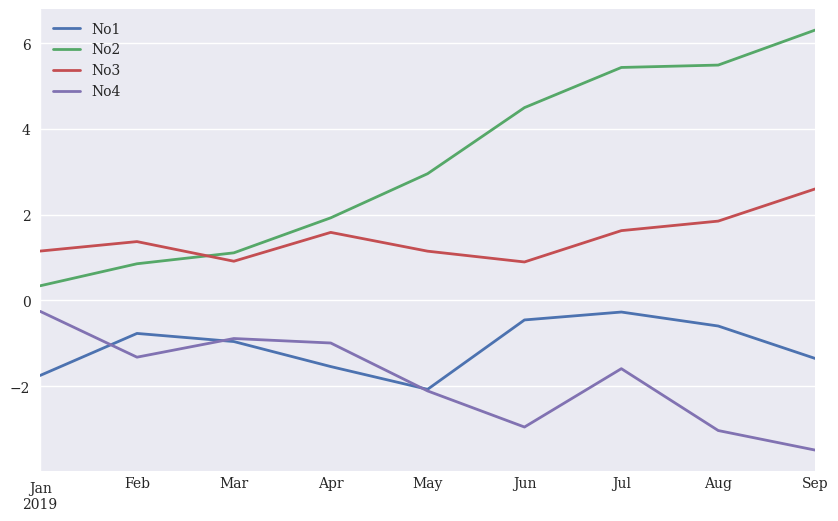

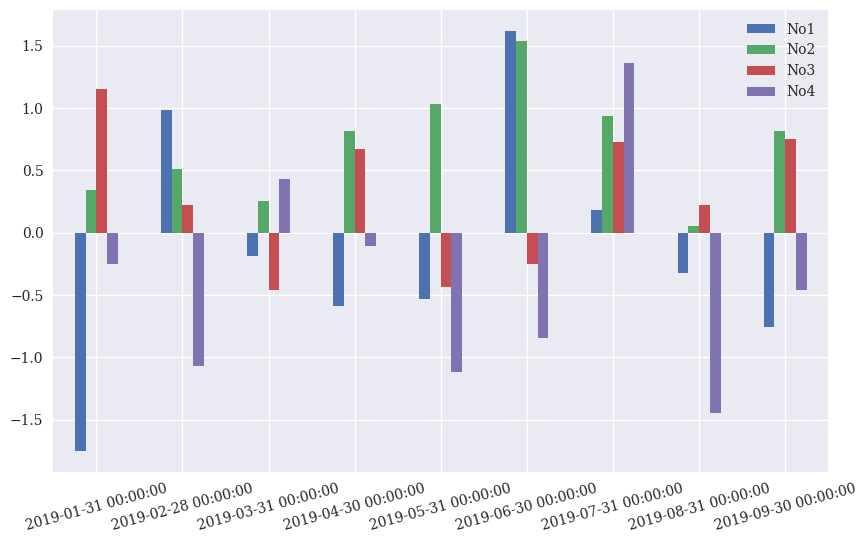

In [86]:
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline                      
    # %matplotlib inline魔术命令来直接在notebook中显示图像。

df.cumsum().plot(linewidth=2.0, figsize=(10,6))

df.plot.bar(figsize=(10,6), rot=15)

### Series 类

In [2]:
import pandas as pd
import numpy as np

np.random.seed(100)
df = pd.DataFrame(
    np.random.standard_normal((9,4)), 
    columns=['No1', 'No2', 'No3', 'No4'], 
    index=pd.date_range('2019-01-01', periods=9, freq='M'))
df

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


In [3]:
s = pd.Series(np.linspace(0,15,7), name='series')
print(s)
print(type(s))

print('-'*30)

n = df['No1']
print(n)
print(type(n))

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64
<class 'pandas.core.series.Series'>
------------------------------
2019-01-31   -1.749765
2019-02-28    0.981321
2019-03-31   -0.189496
2019-04-30   -0.583595
2019-05-31   -0.531280
2019-06-30    1.618982
2019-07-31    0.184519
2019-08-31   -0.326238
2019-09-30   -0.756352
Freq: M, Name: No1, dtype: float64
<class 'pandas.core.series.Series'>


<Axes: >

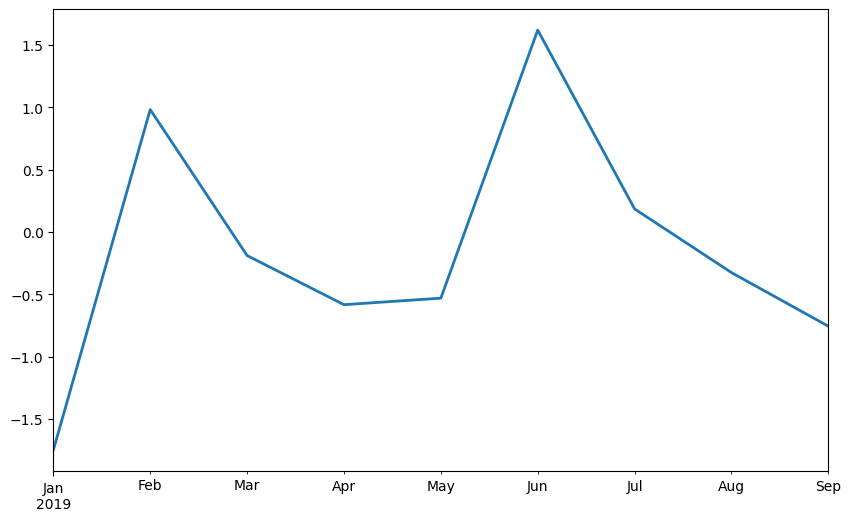

In [14]:
n.plot(linewidth=2.0, figsize=(10,6))

### Group by

In [8]:
df['Quarter']= ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3' ]
groups = df.groupby('Quarter')

print(df)
print(groups.size())
print('*'*30)
print(groups.mean())
print('*'*30)
print(groups.max())
print('*'*30)
print(groups.aggregate([min, max]).round(2))            # 给出每列的最小值和最大值，保留两位小数

                 No1       No2       No3       No4 Quarter
2019-01-31 -1.749765  0.342680  1.153036 -0.252436      Q1
2019-02-28  0.981321  0.514219  0.221180 -1.070043      Q1
2019-03-31 -0.189496  0.255001 -0.458027  0.435163      Q1
2019-04-30 -0.583595  0.816847  0.672721 -0.104411      Q2
2019-05-31 -0.531280  1.029733 -0.438136 -1.118318      Q2
2019-06-30  1.618982  1.541605 -0.251879 -0.842436      Q2
2019-07-31  0.184519  0.937082  0.731000  1.361556      Q3
2019-08-31 -0.326238  0.055676  0.222400 -1.443217      Q3
2019-09-30 -0.756352  0.816454  0.750445 -0.455947      Q3
Quarter
Q1    3
Q2    3
Q3    3
dtype: int64
******************************
              No1       No2       No3       No4
Quarter                                        
Q1      -0.319314  0.370634  0.305396 -0.295772
Q2       0.168035  1.129395 -0.005765 -0.688388
Q3      -0.299357  0.603071  0.567948 -0.179203
******************************
              No1       No2       No3       No4
Quarter        

In [31]:
df['Odd_Even'] = ['odd', 'even', 'odd', 'even', 'odd', 'even', 'odd', 'even', 'odd']
groups = df.groupby(['Quarter', 'Odd_Even'])
print(groups.size())
print(groups[['No1', 'No4']].aggregate([sum, max]))
print(groups[['No1', 'No4']].aggregate([sum, np.mean]))

Quarter  Odd_Even
Q1       even        1
         odd         2
Q2       even        2
         odd         1
Q3       even        1
         odd         2
dtype: int64
                       No1                 No4          
                       sum       max       sum       max
Quarter Odd_Even                                        
Q1      even      0.981321  0.981321 -1.070043 -1.070043
        odd      -1.939261 -0.189496  0.182727  0.435163
Q2      even      1.035387  1.618982 -0.946847 -0.104411
        odd      -0.531280 -0.531280 -1.118318 -1.118318
Q3      even     -0.326238 -0.326238 -1.443217 -1.443217
        odd      -0.571834  0.184519  0.905609  1.361556
                       No1                 No4          
                       sum      mean       sum      mean
Quarter Odd_Even                                        
Q1      even      0.981321  0.981321 -1.070043 -1.070043
        odd      -1.939261 -0.969631  0.182727  0.091364
Q2      even      1.035387  0.517

### 复杂选择

In [42]:
data = np.random.standard_normal((10,2))
df = pd.DataFrame(data, columns=['x', 'y'])
print(df.info())
print('-'*30)
print(df.head())
print('-'*30)
print(df.tail())
print('-'*30)
print(df['x'] > 0.5)
print('-'*30)
print((df['x'] > 0) & (df['y'] < 0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10 non-null     float64
 1   y       10 non-null     float64
dtypes: float64(2)
memory usage: 292.0 bytes
None
------------------------------
          x         y
0  1.125555  0.927053
1 -2.269157 -0.348171
2 -0.164025  1.216581
3 -0.626854 -0.274940
4  1.147457  1.159969
------------------------------
          x         y
5  0.702185 -1.283905
6  1.522308 -0.179963
7 -0.376147  0.460349
8  1.455421  0.241507
9 -0.037667  0.831533
------------------------------
0     True
1    False
2    False
3    False
4     True
5     True
6     True
7    False
8     True
9    False
Name: x, dtype: bool
------------------------------
0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
8    False
9    False
dtype: bool


In [50]:
print(df[df['x'] > 0])
print(df.query('x > 0'))

print('-'*30)

print(df[(df['x'] > 0) & (df['y'] < 0)])
print(df.query('x > 0 & y < 0'))

print('-'*30)

print(df[(df.x > 0) | (df.y < 0)])


          x         y
0  1.125555  0.927053
4  1.147457  1.159969
5  0.702185 -1.283905
6  1.522308 -0.179963
8  1.455421  0.241507
          x         y
0  1.125555  0.927053
4  1.147457  1.159969
5  0.702185 -1.283905
6  1.522308 -0.179963
8  1.455421  0.241507
------------------------------
          x         y
5  0.702185 -1.283905
6  1.522308 -0.179963
          x         y
5  0.702185 -1.283905
6  1.522308 -0.179963
------------------------------
          x         y
0  1.125555  0.927053
1 -2.269157 -0.348171
3 -0.626854 -0.274940
4  1.147457  1.159969
5  0.702185 -1.283905
6  1.522308 -0.179963
8  1.455421  0.241507


In [52]:
print(df > 0)

print(df[df > 0])

       x      y
0   True   True
1  False  False
2  False   True
3  False  False
4   True   True
5   True  False
6   True  False
7  False   True
8   True   True
9  False   True
          x         y
0  1.125555  0.927053
1       NaN       NaN
2       NaN  1.216581
3       NaN       NaN
4  1.147457  1.159969
5  0.702185       NaN
6  1.522308       NaN
7       NaN  0.460349
8  1.455421  0.241507
9       NaN  0.831533


### 联接、连接和合并

#### 联接

In [55]:
df1 = pd.DataFrame(['100', '200', '300', '400'], index=['a', 'b', 'c', 'd'], columns=['A',])
print(df1)

df2 = pd.DataFrame(['200', '150', '50'], index=['f', 'b', 'd'], columns=['B',])
print(df2)

     A
a  100
b  200
c  300
d  400
     B
f  200
b  150
d   50


In [57]:
df1._append(df2, sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [58]:
df1._append(df2, ignore_index=True, sort=False)

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


In [59]:
pd.concat((df1, df2), sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [65]:
pd.concat((df1, df2), ignore_index=True, sort=False)

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


#### 连接

In [66]:
df1.join(df2)

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [67]:
df2.join(df1)

,B,A
f,200,NaN
b,150,200
d,50,400


In [68]:
df1.join(df2, how='left')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [69]:
df1.join(df2, how='right')

,A,B
f,NaN,200
b,200,150
d,400,50


In [70]:
df1.join(df2, how='inner')

,A,B
b,200,150
d,400,50


In [71]:
df1.join(df2, how='outer')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


In [73]:
df = pd.DataFrame()

df['A'] = df1['A']

df

,A
a,100
b,200
c,300
d,400


In [74]:
df['B'] = df2
df

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [75]:
df3 = pd.DataFrame({'A': df1['A'], 'B': df2['B']})
df3

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


#### 合并

In [76]:
c = pd.Series([250, 150, 50], index=['b', 'd', 'c'])
df1['C'] = c
df2['C'] = c

print(df1)

print(df2)

     A      C
a  100    NaN
b  200  250.0
c  300   50.0
d  400  150.0
     B      C
f  200    NaN
b  150  250.0
d   50  150.0


In [78]:
pd.merge(df1, df2)          # 根据共享列C进行合并

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [79]:
pd.merge(df1, df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [81]:
pd.merge(df1, df2, how='outer')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,300,50.0,NaN
3,400,150.0,50


In [83]:
pd.merge(df1, df2, left_on='A', right_on='B')                   # left_on='A'和right_on='B'是指定两个数据框中用来进行匹配的列

,A,C_x,B,C_y
0,200,250.0,200,NaN


In [84]:
pd.merge(df1, df2, left_on='A', right_on='B', how='outer')      # left_on='A'和right_on='B'是指定两个数据框中用来进行匹配的列

,A,C_x,B,C_y
0,100,NaN,NaN,NaN
1,200,250.0,200,NaN
2,300,50.0,NaN,NaN
3,400,150.0,NaN,NaN
4,NaN,NaN,150,250.0
5,NaN,NaN,50,150.0


In [85]:
pd.merge(df1, df2, left_index=True, right_index=True)           # 将df1和df2按照index进行合并

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


In [89]:
pd.merge(df1, df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [91]:
# pd.merge(df1, df2, on='C', left_index=True, right_index=True)      
    # error: Can only pass argument "on" OR "left_index" and "right_index", not a combination of both.

### 性能特征

In [100]:
data = np.random.standard_normal((1000000, 2))
print(data.nbytes)

df = pd.DataFrame(data, columns=['x', 'y'])
print(df.info())

16000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1000000 non-null  float64
 1   y       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB
None


In [101]:
%time res = df['x'] + df['y']       # 直接调用Series方式——最快

CPU times: total: 46.9 ms
Wall time: 23 ms


In [102]:
res[:3]

0    1.128154
1    2.577320
2    0.166689
dtype: float64

In [103]:
%time res = df.sum(axis=1)          # 调用DataFrame对象的sum计算

CPU times: total: 203 ms
Wall time: 196 ms


In [104]:
res[:3]

0    1.128154
1    2.577320
2    0.166689
dtype: float64

In [105]:
%time res = df.values.sum(axis=1)   # 调用ndarray的sum

CPU times: total: 31.2 ms
Wall time: 25.9 ms


In [106]:
res[:3]

array([1.12815376, 2.57731988, 0.16668929])

In [108]:
%time res = np.sum(df, axis=1)      # 调用DataFrame的np.sum

CPU times: total: 828 ms
Wall time: 854 ms


In [109]:
res[:3]

0    1.128154
1    2.577320
2    0.166689
dtype: float64

In [111]:
%time res = np.sum(df.values, axis=1)       # 调用ndarray的np.sum

CPU times: total: 31.2 ms
Wall time: 21.6 ms


In [112]:
res[:3]

array([1.12815376, 2.57731988, 0.16668929])

In [113]:
%time res = df.eval('x + y')

CPU times: total: 46.9 ms
Wall time: 26.9 ms


In [114]:
%time res = df.apply(lambda row: row['x'] + row['y'], axis=1)

CPU times: total: 20.8 s
Wall time: 21.2 s
